# How to Measure Material Properties

Perhaps the most fundamental property of a material is: how does it behave when you push or pull on it? Is it stiff like diamond or soft like Jello? The relationship between <b>forces</b> and <b>deformation</b> is fundamental to the study of materials science, engineering mechanics, biomechanics, and physics, and yet when presented with a new material, we are unable to predict this property from theory - <b>we need to measure it experimentally</b>. 

What is remarkable, is that when the relationship between force and deformation was measured for different materials, a common trend emerged. The [polymath](https://en.wikipedia.org/wiki/Polymath) [Robert Hooke](https://en.wikipedia.org/wiki/Robert_Hooke) was the first to state the law that relates force to deformation (stretching/compression) in 1678, in which he wrote:
<blockquote>
    <i>ut tensio, sic vis</i> ("as the extension, so the force")
</blockquote>    
In other words, the force required to stretch a spring is proportional to the amount it is stretch: the relationship between force and deformation is <b>linear</b> (as long as the material isn't stretched too much). This law is first encountered for springs, in which we write
\begin{equation}
F = k x,
\label{hooke} \tag{1}
\end{equation}
where $F$ is the force acting to extend/compress the spring, $x$ is the amount of extension, and $k$ is the spring stiffness. 

In the study of the <i>mechanics of materials</i>, we generalize equation (1) to a similar equation that relates <b>stress</b> to <b>strain</b>. Why? Well, the spring stiffness $k$ depends on both materials <b>and</b> geometry - using equation (1), a thick piece of rubber will have a larger stiffness than a thin piece of rubber, so how do we isolate the <b>material properties</b> of the rubber? The answer is to correct for changes in geometry by measuring an average stress ($\sigma_{\text{avg}}=F/A$, <i>i.e.</i> force divided by cross sectional area) and the average strain ($\epsilon_{\text{avg}} = \delta/L_0$, <i>i.e.</i> extension or compression divided by the original length), 
\begin{equation}
\sigma_{\text{avg}} = E \epsilon_{\text{avg}},
\label{hookeSS} \tag{2}
\end{equation}
where the term that measures the proportionality between stress and strain is $E$, [Young's Elastic Modulus](https://en.wikipedia.org/wiki/Young%27s_modulus). 

Elastic materials that are <b>homogenous</b> (its properties do not depend on <i>position</i>) and <b>isotropic</b> (its properties do not depend on <i>direction</i>) can be described by three material propertes: Young's modulus $E$, shear modulus $G$, and Poisson's ratio $\nu$. Young's modulus measures a material's resistance to being stretched or compresses (how hard is it to deform a rectangular shaped material into a bigger/smaller rectangle?). The shear modulus measures a materials resistance to being distorted (how hard is it to distort a rectangular shaped material into a [parallelepiped](https://en.wikipedia.org/wiki/Parallelepiped)?). [Poisson's ratio](https://en.wikipedia.org/wiki/Poisson%27s_ratio) measures how much a material contracts or expands in directions perpendicular to the direction of applied extension or compression. While there are three properties that characterize a homogenous, only two are independent - <i>i.e.</i> if you measure two, you can calculate the third. For instance, the shear modulus can be calculated once you know $E$ and $\nu$ by
\begin{equation}
G = \frac{E}{2(1+\nu)}.
\tag{3}
\end{equation}

In this lab, we will learn how to measure $E$ and $\nu$, and we will use equation (3) to calculate $G$.

## Measuring Strain via Image Processing

To determine Young's elastic modulus for a material, we would like to apply a force that stretches it in one direction, and measure the corresponding strain. For Hooke's law to be relevant, those strains need to be very small. How small? This can vary from material to material, but typically less than $1\%$. Recall that the average strain is a measure of how much a material stretches/compresses relative to its original length, <i>i.e.</i>
\begin{equation}
\epsilon_{\text{avg}} = \frac{L-L_0}{L_0} = \frac{\delta}{L_0}, 
\end{equation}
where $\delta = L-L_0$ is displacement, or difference between the deformed length $L$ and the initial length $L_0$. 

In the lab or in the field, strain can be measured a variety of ways. For traditional engineering materials - steel, aluminum, concrete, wood - the amount of displacement that corresponds to "small strains" can be incredibly small, and may require an [extensometer](https://en.wikipedia.org/wiki/Extensometer) to measure the displacement of material points. A technique that can measure strain at many points on surface simultaneously is called [Digital Image Correlation (DIC)](https://en.wikipedia.org/wiki/Digital_image_correlation_and_tracking), which involves comparing images to measure how much material points moved in response to an applied load. The simplest form of DIC can be done by hand with only a camera and a computer. 

Before we attempt this analysis with a real experiments, we will practice measuring strain using image processing a photograph from Wikipedia's entry on Hooke's law.

First, we need to load in the Python libraries we need, which involves three steps: 1.) letting us display images and graphs in this Jupyter notebook, 2.) installing a tool that let's us measure points on a picture, and 3.) loading in libraries to help us deal with data/matrices/images/etc. Click SHIFT+ENTER to evaluate each of the next three cells:

In [1]:
# Python preliminaries, this let's us plot graphs/images in the notebook
%matplotlib notebook

In [2]:
# Installing mplcursors, so we can measure things in pictures
installMPLCursors = !pip install git+https://github.com/anntzer/mplcursors

In [3]:
# Python preliminaries, various libraries we use 
import matplotlib.pyplot as plt   # matlab plotting
import numpy as np                # working with matrices
np.warnings.filterwarnings('ignore')
from skimage import io            # working with images
import mplcursors                 # getting pixel info off images
import pandas as pd               # working with data/tables

Next, we will initialize two lists that we will use to store force data and displacement data. At rest, we expect there to be zero displacement when zero force is applied.

In [4]:
force = [0]
displacement = [0]

The next cell will load an image from Wikipedia by using: 
````
io.imread('URL or File Location')
````
then it will show the image, and allow us see the (x,y) location of any pixel that we click. 

<b>Note:</b> There will be a clickable power button icon on the top right corner of the image that you should click when you're done clicking on the image (you can always re-run the cell below to make additional measurements). This process will be faster if you make all of your measurements at once, jotting them down in a notebook.

### Procedure:
<ol>
    <li>Grab a pen and paper to take notes.</li>
    <li>Run the cell below this one.</li>
    <li><b>Measure the initial spring length</b></li>
        <ol>
            <li>Click the top of the spring, record the pixel value of the $y$ coordinate.</li>
            <li>Click the bottom of the spring, record the pixel value of the $y$ coordinate.</li>
        </ol>    
    <li><b>Measure the spring length spring with 1 mass attached ($F=1$)</b></li>
        <ol>
            <li>Click the top of the spring, record the pixel value of the $y$ coordinate.</li>
            <li>Click the bottom of the spring, record the pixel value of the $y$ coordinate.</li>
        </ol>    
    <li><b>Measure the spring length spring with 2 masses attached ($F=2$)</b></li>
        <ol>
            <li>Click the top of the spring, record the pixel value of the $y$ coordinate.</li>
            <li>Click the bottom of the spring, record the pixel value of the $y$ coordinate.</li>
        </ol>
    <li>Click the power button icon on the top right of the image.</li>
</ol>    

<IPython.core.display.Javascript object>


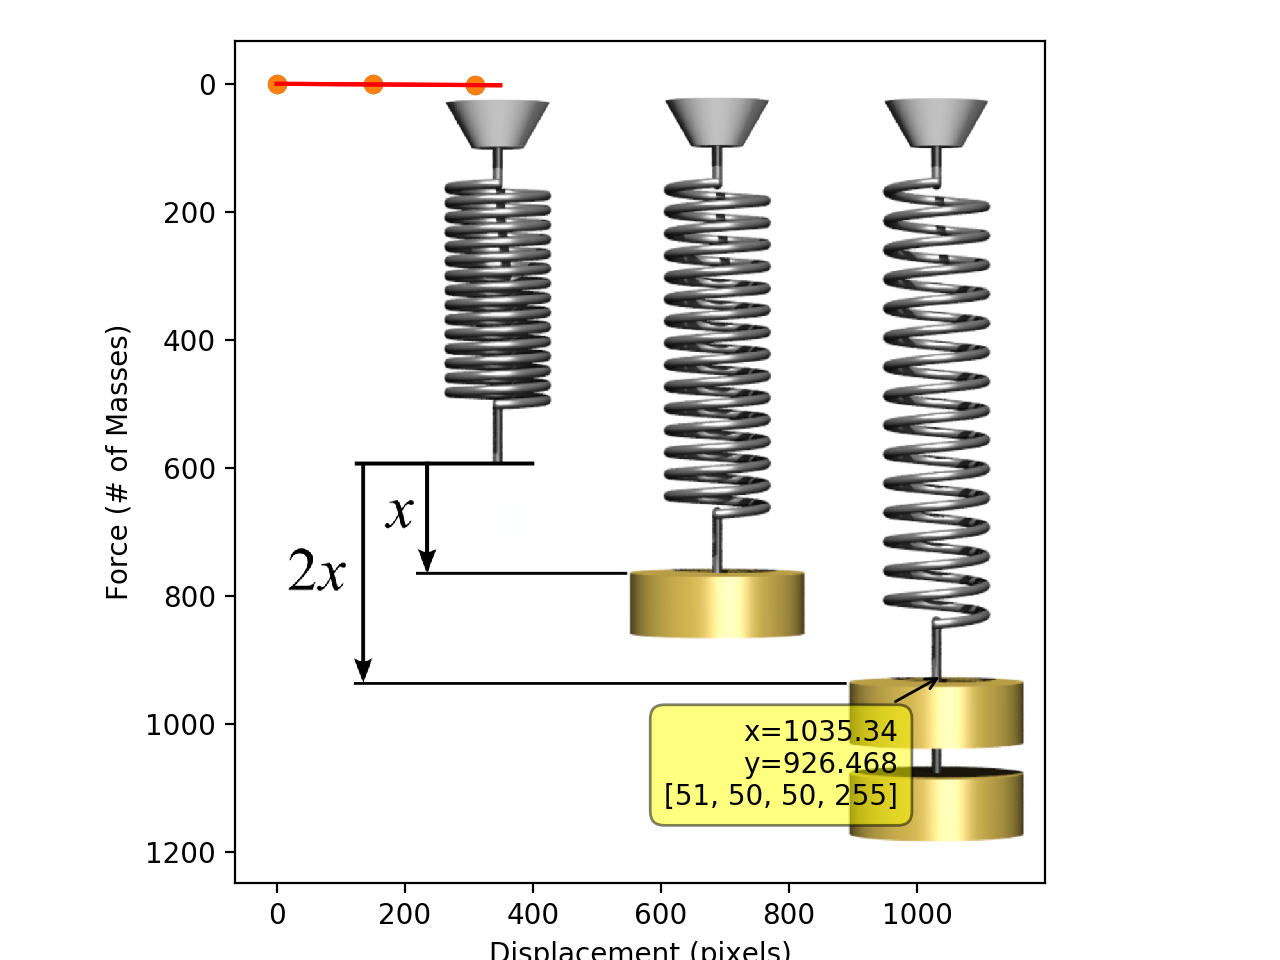

In [5]:
# currently can't get this to work with a Google Drive shareable link, not sure why. working on it.
img = io.imread('https://upload.wikimedia.org/wikipedia/commons/thumb/f/fc/Hookes-law-springs.png/1200px-Hookes-law-springs.png')

io.imshow(img)
mplcursors.cursor()
plt.show()

Calculate the initial length of the spring in units of pixels:

In [6]:
yi1 = float(input("Enter the y value of the upper point, with no force applied (px): "))
yi2 = float(input("Enter the y value of the lower point, with no force applied (px): "))
L0 = round(abs(yi2-yi1),3) # this length must be positive
print("Initial length L0 =", L0, "pixels")

Enter the y value of the upper point, with no force applied (px): 105
Enter the y value of the lower point, with no force applied (px): 595
Initial length L0 = 490.0 pixels


Calculate the deformed length of the spring. Let's use fictious values of the applied force, such that $F=1$ for one mass is hanging on the spring, and $F=2$ for two masses. Use the code below to enter those values - it will calculate $x$ and store the force and displacement in our lists. You will have to run this cell <b>twice</b> one for each measurement.

In [8]:
# run this cell twice

# ...did you make a mistake? enter the wrong value? want to start over? uncomment the following lines:
#force = [0]
#displacement = [0]

F  = float(input("Enter the applied force (# of Masses): "))
y1 = float(input("Enter the y value of the upper point (px): "))
y2 = float(input("Enter the y value of the lower point (px): "))
L  = round(abs(y2-y1),3) # this experiment only involves tension
x = round(L-L0,3)
force.append(F)
displacement.append(x)

print("displacement =", x, "pixels")

Enter the applied force (# of Masses): 2
Enter the y value of the upper point (px): 105
Enter the y value of the lower point (px): 905
displacement = 310.0 pixels


Let's put our measurements in a table:

In [9]:
data = {'Force (unitless)': force, 'Displacement (pixels)': displacement}
dataTable = pd.DataFrame(data)
dataTable

,Force (unitless),Displacement (pixels)
0,0.0,0.0
1,1.0,150.0
2,2.0,310.0


Something not correct in your data? To delete a row, use the following command:
````
dataTable.drop([ENTER_ROW_NUMBER_TO_DELETE])
````
Remember, Python starts counting from 0, not 1.

In [ ]:
# uncomment if you need to delete a row of data
#dataTable.drop([1])

Now, let's calculate the spring stiffness of the Wikipedia spring. In linear elasticity, we make the assumption that the [constitutive relationship](https://en.wikipedia.org/wiki/Constitutive_equation) between force and displacement, or stress and strain is <b>linear</b>. Therefore, if we fit our force vs. displacement data to a linear curve, the slope of the curve will be the stiffness $k$. We will use [linear regression](https://en.wikipedia.org/wiki/Linear_regression) to fit our data. The way simplest linear regression in python is by calling:
````
np.polyfit(displacement, force, 1)
````
and storing the result of that call as a variable. This will give us the best linear fit to our data in the form of $y = mx+b$. The result from Python will be a list with two numbers: [slope intercept]

In [10]:
# first we must convert displacement and force from lists to a numpy array
d = np.array(displacement)
f = np.array(force)
model_general = np.polyfit(displacement, force, 1) # the 1 is for linear, or 1st order polynomial
print('F =', np.poly1d(model_general))

F =  
0.006449 x + 0.0111


What's the problem with this result? Well, Hooke's law states that $F = kx$, not $F=kx+b$. Physically, this means there should be zero displacement when there is zero force applied, and vice versa, <i>i.e.</i> $b=0$. In order to force the intercept to be equal to zero, we will use a least squares regression from the linear algebra class within numpy:
````
np.linalg.lstsq(d.reshape(-1,1), force)[0][0]
````
The result from Python will be the slope, <i>i.e.</i> the stiffness $k$.

In [11]:
model_fixIntercept = np.linalg.lstsq(d.reshape(-1,1), force)[0][0]
print('F =', round(model_fixIntercept,6), 'x')

F = 0.006492 x


<IPython.core.display.Javascript object>


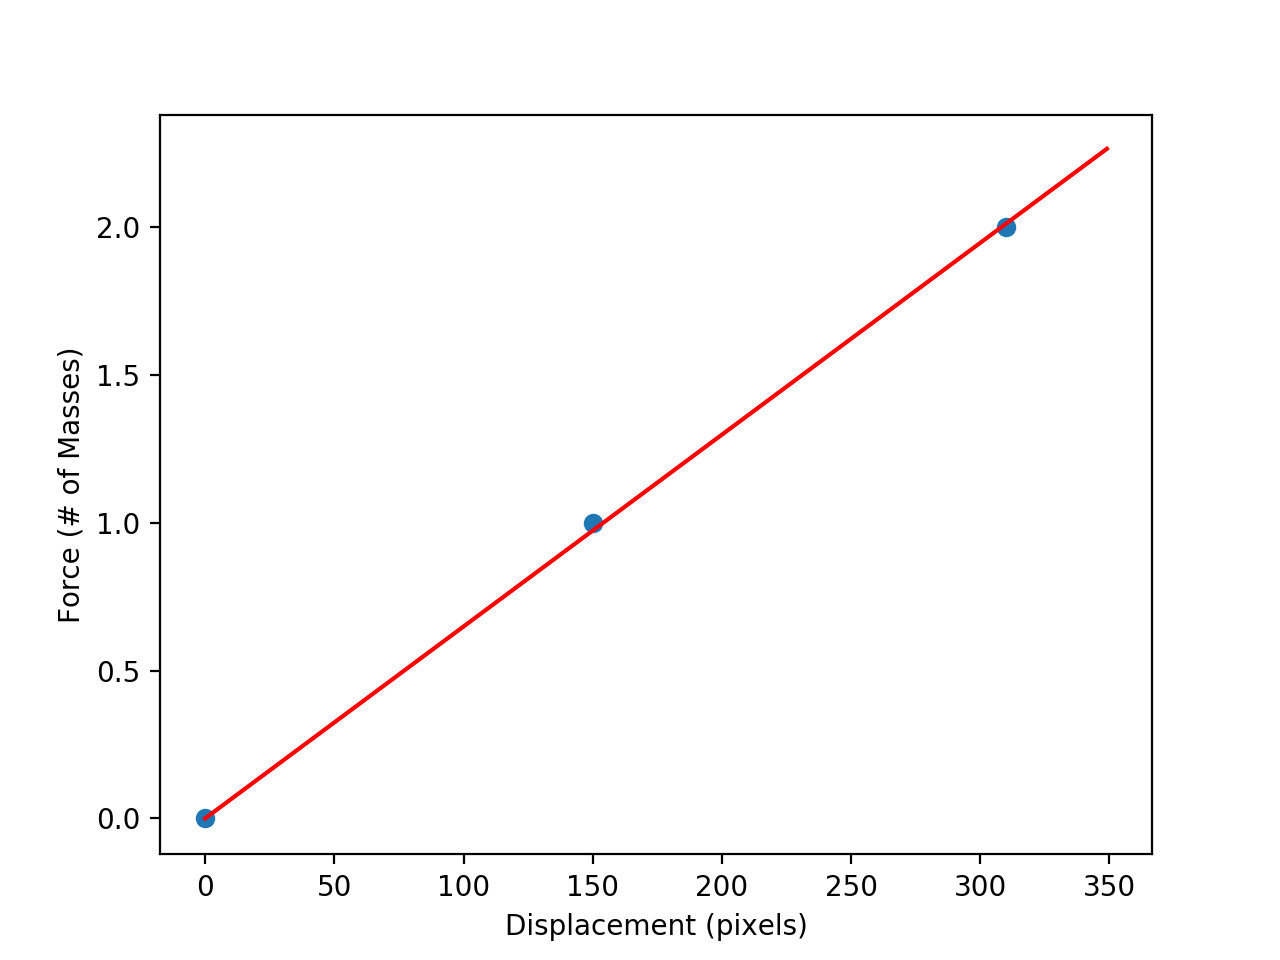

In [15]:
# make a range of x
disp_model = range(0, 350)
# calculate the force from our linear model
force_model = model_fixIntercept*disp_model

plt.scatter(displacement, force)
plt.plot(disp_model, force_model, c = 'r')
plt.xlabel("Displacement (pixels)")
plt.ylabel("Force (# of Masses)")
plt.show()

In [14]:
k = round(model_fixIntercept, 5)
print("Spring Stiffness =", k, "force/pixel") 

Spring Stiffness = 0.00649 force/pixel


## Modulus of a Rubber Band

Now that we are able to measure <b>strain</b> from a photograph, we can measure the elastic modulus of various materials by applying known forces to them. We can use common household materials to apply different forces. Any combination of the various objects listed in [Appendix A](#mass) will enable you to apply a range of forces. 

<blockquote>
Your task for this lab is to <b>measure</b> the elastic modulus $E$ and Poisson ratio $\nu$ and use equation (3) to <b>calculate</b> the shear modulus $G$ of a rubber band.
</blockquote>

In order to measure $E$ and $\nu$ of a material, we need to measure the following things:
<ol>
    <li>The object's initial length $L_0$, and initial cross sectional area $A_0$. For this lab, we will be studying rubber bands, which typically have a rectangular cross section, therefore we will need the width $W_0$ and thickness $h_0$ to calculate $A_0=W_0h_0$.  </li>
    <ol>
        <li>Typically, $L_0$ is <b>not</b> the total length of the object/specimen. Instead, we mark two points on the object far away from the edges, and measure how the distance between these points changes. Why? Well, for this measurement to be accurate, we need the stress to be uniform across the entire cross section of the material. According to <a href="https://en.wikipedia.org/wiki/Saint-Venant%27s_principle">St. Venant's Principle</a>, this typically occurs far away from where the load is applied.
    </ol>                
    <li>The deformed length $L$ and width $W$ for each force $F$ we apply. </li>
    <ol>
        <li>Therefore, we can calculate the axial strain as $\epsilon_{\text{axial}}=(L-L_0)/L_0$.</li>
        <li>...and the transverse strain as $\epsilon_{\text{transverse}}=(W-W_0)/W_0$. </li>
    </ol>
    <li>We can calculate Poisson's ratio by: $\nu=-\epsilon_{\text{transverse}}/\epsilon_{\text{axial}}$</li>
    <li>Dividing $F$ by the initial cross sectional area $A_0$ gives a measure of the "<a href="https://en.wikipedia.org/wiki/Stress%E2%80%93strain_curve#Engineering_stress_and_strain">engineering stress</a>" or "nominal stress", $\sigma$.</li>
    <li> A plot of stress vs. axial strain will allow us to calculate $E$ using a linear regression.
</ol>    



### Example Experiments

Here's an example showing images of a rubber band in its initial state (left) and deformed state (right). I have labeled $L_0$, $L$, $W_0$, and $W$. (Note: I did not include a side image which will be necessary to measure $h_0$.) In the deformed image, the rubber band is loaded with a C battery. According to [Appendix A](#mass) has a mass of $m=67$ g, which corresponds to a force of $F = 0.657$ N. In each image, I have included an object with a known physical dimension - in this case, a AA battery whose length is $L_b = 50.5$ mm (see: [Appendix A](#mass)). This is important, as it allows us to convert our measurements from pixels to mm (see: [Appendix B](#tips)). 

<img src = "https://www.bu.edu/moss/files/2020/05/rubberBand.jpg">

### Code for the Lab

In [17]:
del F, y1, y2, yi1, yi2, L0, L, force, displacement

In [ ]:
force = [0]
stress = [0]
strain_axial = [0]
strain_transverse = [0]
poisson = []

### Initial Dimensions of the Rubber Band

In [ ]:
# import image

In [19]:
# measure the length of the object in pixels
actualLength = float(input("Enter the physical length of an object in your image (mm): "))
pixelLength  = float(input("Enter the length of that object in pixels (px): "))
pixel_to_mm = actualLength/pixelLength
print('The conversion of pixels to mm is', pixel_to_mm, 'mm/px for this image.')

Enter the physical length of an object in your image (mm): 55
Enter the length of that object in pixels (px): 200
The ratio of pixels to mm is 0.275 mm/px for this image


In [21]:
# Measure L_0
L0_px = float(input("Enter the initial length, L0, in pixels (px): "))
L0  = round(L0_px*pixel_to_mm,3) 
print('The initial length is', L0, 'mm')

Enter the initial length, L0, in pixels (px): 275


In [ ]:
# Measure W_0
W0_px = float(input("Enter the initial length, L0, in pixels (px): "))
W0  = round(W0_px*pixel_to_mm,3) 
print('The initial width is', W0, 'mm')

In [ ]:
# Measure h_0
h0_px = float(input("Enter the initial length, h0, in pixels (px): "))
h0  = round(h0_px*pixel_to_mm,3) 
A0  = W0*h0
print('The initial thickness is', h0, 'mm', 'and the initial cross sectional area is', A0, 'mm^2')

### Deformed Dimensions of Rubber Band

In [ ]:
# load image

In [ ]:
# repeat this cell 5-7 times for all the images you have
F  = float(input("Enter the applied force (N): "))
sigma = F/A0
y1 = float(input("Enter the y value of the upper point (px): "))
y2 = float(input("Enter the y value of the lower point (px): "))
L  = round(abs(y2-y1),3) # abs(): since this experiment only involves tension

x1 = float(input("Enter the x value of the left point (px): "))
x2 = float(input("Enter the y value of the right point (px): "))
W  = round(abs(x2-x1),3) # abs(): width should be a positive number
epsilon_axial      = round((L-L0)/L0,3)
epsilon_transverse = round((W-W0)/W0,3)
poisson_ratio = -epsilon_transverse/epsilon_axial

force.append(F)
stress.append(sigma)
strain_axial.append(epsilon_axial)
strain_transverse.append(epsilon_transverse)
poisson.append(poisson_ratio)

#print("displacement =", x, "pixels")

In [ ]:
dataRubber = {'Force (N)': force, 'Stress (??)': stress, 'Strain (unitless)': strain_axial, 'Poisson Ratio': poisson}
dataTableRubber = pd.DataFrame(dataRubber)
dataTable

<a id='mass'></a>
## Appendix A: Masses of Various Objects

| Object | Mass (g) | Diameter (mm) | Height (mm) |
| --- | --- | --- | --- |
| Dime | 2 | 17.9 | 1.35 |
| Penny | 3 | 19.1 | 1.52 |
| Nickel | 5 | 21.2 | 1.95 |
| Quarter | 5.6 | 24.3 | 1.75 |
| AAA Battery | 11 | 10.5 | 44.5 |
| AA Battery | 24 | 14.5 | 50.5 |
| 9V Battery | 45 | n/a  | 48.5  |
| C Battery | 67 | 26.2 | 50.0 |
| D Battery | 136 | 34.2 | 61.5 |

<a id='tips'></a>
## Appendix B: Practical Tips

<ol>
    <li>Hang your rubber band vertically, so that $F = mg$, where $g = 9.81 m/s^2$, and $m$ is the mass of the object(s).</li>
    <li>Never work with pixels, <b>always convert your measurements to a unit of physical length</b>, <i>e.g.</i> mm.</li>
    <ol>
        <li><b>Tip</b>: Put something that you know the physical size of in the photograph.  Then, you can measure the length of that known object in pixels, and convert to a phyiscal unit of measure. Dimensions of various common objects are listed in [Appendix A](#mass).</li>
        <li>The conversion from pixels to mm might change from picture to picture because your camera might not be the same distance from the sample each time.</li>
    </ol>
    <li>Don't use a known volume of water as your mass. You will almost certainly spill this water everywhere.</li>
    <li>Take measurements of strain using least 5 to 7 different masses. Remember: Hooke's law is valid for <b>small strains</b>, so take more of your measurements with small increments of applied force.</li>
    <li>The moduli of most rubbers are between $0.1 \leq E \leq 10$ MPa, and the Poisson's ratio are typically very close to $\nu \approx 0.5$. If your values are very different from these quantities, you have probably done something wrong.</li>       
</ol>